In [21]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('data/stud.csv')

In [5]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [6]:
df.head

<bound method NDFrame.head of      gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none      

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
print(f"Numeric features ({len(numeric_features)}):")
for col in numeric_features:
    print(f"  - {col} ({df[col].dtype})")

print(f"\nCategorical features ({len(categorical_features)}):")
for col in categorical_features:
    print(f"  - {col} ({df[col].dtype})")

Numeric features (3):
  - math_score (int64)
  - reading_score (int64)
  - writing_score (int64)

Categorical features (5):
  - gender (object)
  - race_ethnicity (object)
  - parental_level_of_education (object)
  - lunch (object)
  - test_preparation_course (object)


In [15]:
df['total_score'] = df[numeric_features].sum(axis=1, min_count=1)
df['average_score'] = df[numeric_features].mean(axis=1).round(2)

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


/var/folders/yf/25zyyj4516vdh9fqfkh151lc0000gn/T/ipykernel_5204/2805074222.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.dropna(subset=["avg_bin"])


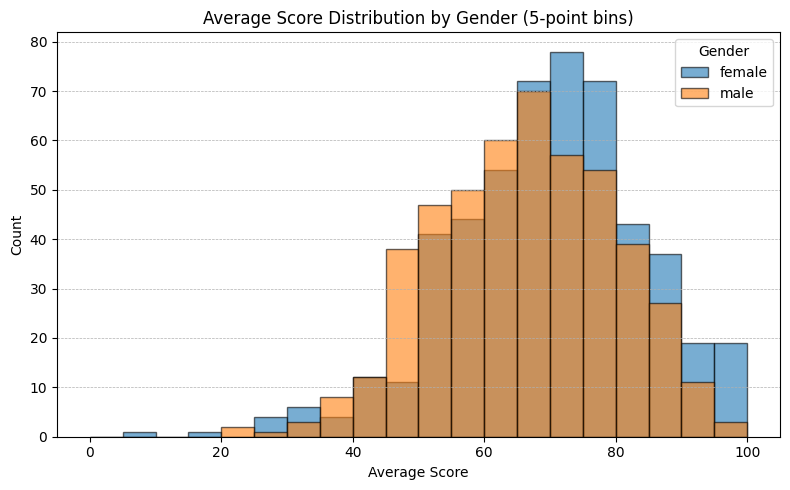

In [19]:
bin_edges = np.arange(0, 101, 5)  # 0,5,...,100
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]}" for i in range(len(bin_edges)-1)]
df["avg_bin"] = pd.cut(df["average_score"], bins=bin_edges, include_lowest=True, labels=bin_labels)

# 3) Counts per 5-step bracket by gender (+ total)
counts_by_bin_gender = (
    df.dropna(subset=["avg_bin"])
      .groupby(["avg_bin", "gender"])
      .size()
      .unstack(fill_value=0)
      .reindex(bin_labels)  # ensure sorted bin order
)
counts_by_bin_gender["TOTAL"] = counts_by_bin_gender.sum(axis=1)

# 4) Histogram of average marks by gender
plt.figure(figsize=(8, 5))
for g in df["gender"].dropna().unique():
    subset = df.loc[df["gender"] == g, "average_score"].dropna()
    plt.hist(subset, bins=bin_edges, alpha=0.6, edgecolor="black", label=str(g))

plt.title("Average Score Distribution by Gender (5-point bins)")
plt.xlabel("Average Score")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.grid(True, axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

/var/folders/yf/25zyyj4516vdh9fqfkh151lc0000gn/T/ipykernel_5204/1603964972.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.dropna(subset=["avg_bin", "race_ethnicity"])


Counts per 5-point bracket (rows) by race_ethnicity (columns):
race_ethnicity  group A  group B  group C  group D  group E
avg_bin                                                    
0-5                   0        0        0        0        0
5-10                  0        0        1        0        0
10-15                 0        0        0        0        0
15-20                 0        1        0        0        0
20-25                 1        1        0        0        0
25-30                 0        3        2        0        1
30-35                 0        2        3        2        1
35-40                 2        1        4        6        1
40-45                 5        6        8        1        4
45-50                 9       13       17       12        2
50-55                12       18       23       23        8
55-60                11       18       43       21        7
60-65                12       33       31       27       12
65-70                12       23     

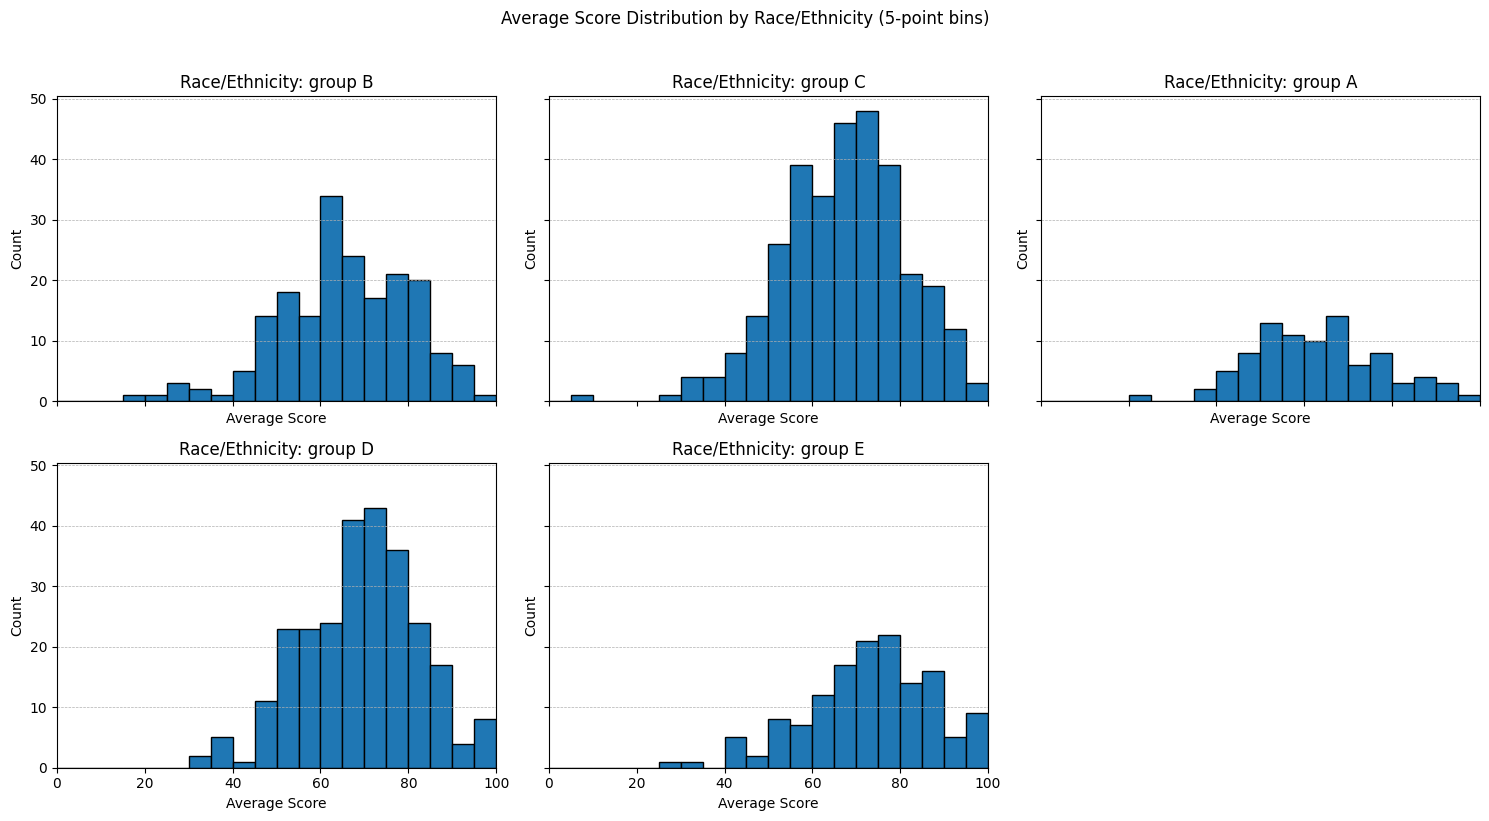

In [22]:
# 2) Make 5-point bins and label them
bin_edges = np.arange(0, 101, 5)  # 0,5,...,100
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]}" for i in range(len(bin_edges)-1)]
df["avg_bin"] = pd.cut(df["average_score"], bins=bin_edges, include_lowest=True, labels=bin_labels)

# 3) Counts per 5-step bracket by race_ethnicity (rows=bins, cols=races)
counts_by_bin_race = (
    df.dropna(subset=["avg_bin", "race_ethnicity"])
      .groupby(["avg_bin", "race_ethnicity"])
      .size()
      .unstack(fill_value=0)
      .reindex(bin_labels)  # ensure sorted bin order
)
print("Counts per 5-point bracket (rows) by race_ethnicity (columns):")
print(counts_by_bin_race)

# 4) Separate histogram for each race_ethnicity
races = df["race_ethnicity"].dropna().unique().tolist()
n = len(races)
cols = min(3, n) if n > 0 else 1
rows = math.ceil(n / cols) if n > 0 else 1

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharex=True, sharey=True)
if n == 1:
    axes = np.array([axes])  # normalize for single axis

for i, race in enumerate(races):
    ax = axes.flat[i]
    subset = df.loc[df["race_ethnicity"] == race, "average_score"].dropna()
    ax.hist(subset, bins=bin_edges, edgecolor="black")
    ax.set_title(f"Race/Ethnicity: {race}")
    ax.set_xlabel("Average Score")
    ax.set_ylabel("Count")
    ax.set_xlim(0, 100)
    ax.grid(True, axis="y", linestyle="--", linewidth=0.5)

# Hide any unused subplots
for j in range(i+1, rows*cols):
    axes.flat[j].axis("off")

fig.suptitle("Average Score Distribution by Race/Ethnicity (5-point bins)", y=1.02, fontsize=12)
plt.tight_layout()
plt.show()